# Lab 7
###### Dekompozycja spektralna

In [1]:
import numpy as np # np.linalg.eig
import time
import matplotlib.pyplot as plt
import scipy.linalg as scplin

### 1. Metoda potęgowa
Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co
do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację
z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od
rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...)
* Powtarzaj mnożenie wektora xi przez macierz A: $x_{i+1} = Ax_i$ , dzieląc za każdym razem wektor wynikowy przez $||x_{i+1}||_∞$
* Element wektora $x_i$ o największej wartości bezwzględnej zbiega do dominującej wartości własnej
* Przeskalowany wektor $x_i$ zbiega do dominującego wektora własnego
* Obliczenia powinny się zatrzymać po przekroczeniu maksymalnej liczby iteracji, albo w przypadku gdy $||x_i − x_{i+1}|| < \epsilon$ (kryterium małej poprawki)
* Pod koniec obliczeń znormalizuj otrzymany wektor własny.

In [2]:
def genmatrix(n, val=1):
    M = np.random.uniform(-val, val, (n,n))
    return np.tril(M) + np.tril(M, -1).T

Generowanie losowej macierzy symetrycznej

In [3]:
def power(M, eps=1e-10, st=1e4):
    V = np.random.random_sample(M.shape[0])
    cnt = 0
    for i in range(int(st)):
        nex = M @ V
        normed = nex / np.linalg.norm(nex, ord=np.inf)
        if np.linalg.norm(V - normed) < eps:
            V = normed
            break
        V = normed
        cnt+=1
    return nex[np.argmax(abs(nex))], V/np.linalg.norm(V), cnt

Funkcja rozwiązująca zadany problem - dla danej macierzy wykonuje metodę potęgową i wyznacza wartość oraz wektor własny macierzy.

In [4]:
def libeig(M):
    val, vec = np.linalg.eig(M)
    ix = np.argmax(abs(val))
    return val[ix], vec[:,ix]

Wykorzystanie funkcji eig z pakietu numpy.linalg do rozwiązania tego samego problemu

In [5]:
def check(eps=1e-6):
    po = []
    lib = []
    for i in range(100, 1001, 100):
        M = genmatrix(i)
        start = time.time()
        w1,v1,cnt = power(M)
        end = time.time()
        po.append(end-start)
        
        start = time.time()
        w2,v2 = libeig(M)
        end = time.time()
        lib.append(end-start)
        
        if v1[0]*v2[0]<0:
            v2=-v2
        
        print(f"Size {i}x{i}, values eq: {abs(abs(w2)-abs(w1))<eps}, vectors eq: {np.all(abs(v2-v1)<eps)},",
              f"times: lib - {round(lib[-1], 8)}, power - {round(po[-1], 8)}, its - {cnt}")
    
    plt.plot(np.linspace(100, 1000, 10), po, color="green")
    plt.plot(np.linspace(100, 1000, 10), lib, color="red")
    plt.show()

Size 100x100, values eq: True, vectors eq: True, times: lib - 0.05190706, power - 1.03302503, its - 10000
Size 200x200, values eq: True, vectors eq: True, times: lib - 0.07484341, power - 1.82344508, its - 10000
Size 300x300, values eq: True, vectors eq: True, times: lib - 0.1684792, power - 0.91269946, its - 10000
Size 400x400, values eq: True, vectors eq: True, times: lib - 0.30111408, power - 1.01666331, its - 10000
Size 500x500, values eq: True, vectors eq: True, times: lib - 0.56102324, power - 1.28127527, its - 10000
Size 600x600, values eq: True, vectors eq: True, times: lib - 0.86852503, power - 1.76625299, its - 10000
Size 700x700, values eq: True, vectors eq: True, times: lib - 1.13364196, power - 2.32441092, its - 8943
Size 800x800, values eq: True, vectors eq: True, times: lib - 1.50380754, power - 3.35230207, its - 10000
Size 900x900, values eq: True, vectors eq: True, times: lib - 1.95849609, power - 5.0300734, its - 10000
Size 1000x1000, values eq: True, vectors eq: True

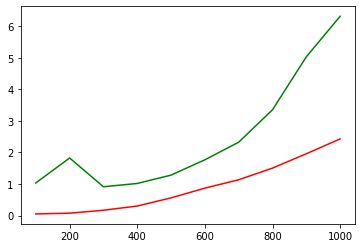

In [6]:
check()

Funkcja sprawdzająca poprawność i rysująca wykres zależności czasów od rozmiarów macierzy

Jak widać funkcja zwraca podobne wartości, jednak często wykonuje się trochę dłużej, co prawdopodobnie jest spowodowane dokładnością wykonywanych obliczeń i związaną z nią maksymalną liczbą iteracji.

### 2. Odwrotna metoda potęgowa
Opierająca się na twierdzeniu o transformacji widma maicerzy:\
Twierdzenie:\
Macierz $(A-\sigma I)^{-1}$ (jeśli istnieje), to ma wartości właśne równe $1/(\lambda_k-\sigma)$ ($\lambda_k$ jest k-tą wartością właśną macierzy A) i wektory własne identyczne z macierzą A.\
oraz wykorzystując metodę potęgową i faktoryzację LU zaimplementuj odwrotną metodę potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy A, dla wartości $\sigma$ bliskich wartości właśnej. Wykorzystaj fakt, że mnożenie wektora $x_i$ przez macierz A^{-1} ($x_{i+1}=A^{-1}x_i$) odpowiada rozwiązaniu układu równań $Ax_{i+1}=x_i$

In [7]:
def invpow(M, sig, eps=1e-10, st=1e3):
    V = np.random.random_sample(M.shape[0])
    P,L,U = scplin.lu(M-sig*np.identity(M.shape[0]))
    for i in range(int(st)):
        y = scplin.solve_triangular(L, P@V, lower=True)
        nex = scplin.solve_triangular(U, y)
        normed = nex/np.linalg.norm(nex, ord=np.inf)
        if np.linalg.norm(normed-V) < eps:
            V=normed
            break
        V=normed
#     print(i)
    return V/np.linalg.norm(V)

Funkcja rozwiązująca zadany problem - dla danej macierzy wykonuje odwrotną metodę potęgową i wyznacza wektor własny macierzy.

In [8]:
def test(eps=1e-10):
    lib = []
    po = []
    for i in range(100, 1001, 100):
        M = genmatrix(i)
        
        start = time.time()
        w2,v2 = libeig(M)
        end = time.time()
        lib.append(end-start)
        
        start = time.time()
        v1 = invpow(M, w2)
        end = time.time()
        po.append(end-start)
        
        if v1[0]*v2[0]<0:
            v2=-v2
        
        print(f"Size {i}x{i}, vectors eq: {np.all(abs(v2-v1)<eps)},",
              f"times: lib - {round(lib[-1], 8)}, invpower - {round(po[-1], 8)}")

In [9]:
test()

Size 100x100, vectors eq: True, times: lib - 0.03597236, invpower - 0.42761564
Size 200x200, vectors eq: True, times: lib - 0.07457566, invpower - 0.72008276
Size 300x300, vectors eq: True, times: lib - 0.18224072, invpower - 1.01561427
Size 400x400, vectors eq: True, times: lib - 0.35126138, invpower - 1.72416425
Size 500x500, vectors eq: True, times: lib - 0.53574848, invpower - 2.5378468
Size 600x600, vectors eq: True, times: lib - 0.83779645, invpower - 3.59594417
Size 700x700, vectors eq: True, times: lib - 1.10878158, invpower - 4.63301086
Size 800x800, vectors eq: True, times: lib - 1.47493982, invpower - 0.03645253
Size 900x900, vectors eq: True, times: lib - 2.01628065, invpower - 7.23550487
Size 1000x1000, vectors eq: True, times: lib - 2.36517167, invpower - 0.06650829


Jak widać, zaimplementowana metoda jest poprawna i zwraca bardzo podobne wyniki do oczekiwanych, wymaga jednak podania przybliżenej wartości własnej.\
Jest trochę wolniejsza od normalnej metody potęgowej(musiałem zmniejszyć maksymalną liczbę iteracji), jeżeli nie będzie spełniony warunek z kryterium małej poprawki(za mały epsilon), jednak często zdarza się że jest spełniony i funkcja kończy się bardzo szybko.

In [10]:
def rayleigh(M, sig, eps=1e-6, st=1e2):
    V = np.random.random_sample(M.shape[0])
    for i in range(int(st)):
        P,L,U = scplin.lu(M-sig*np.identity(M.shape[0]))
        y = scplin.solve_triangular(L, P@V, lower=True)
        nex = scplin.solve_triangular(U, y)
        normed = nex/np.linalg.norm(nex, ord=np.inf)
        if np.linalg.norm(V-normed) < eps:
            V = normed
            sig = (V.T@M@V)/(V.T@V)
            break
        V=normed
        sig = (V.T@M@V)/(V.T@V)
#     print(i)
    return sig, (V/np.linalg.norm(V)).reshape(M.shape[0])

Funkcja rozwiązująca zadany problem - dla danej macierzy korzystając z metody rayleigha i wyznacza wektor własny macierzy.

In [11]:
def rev(eps=1e-10):
    lib = []
    po = []
    for i in range(100, 1001, 100):
        M = genmatrix(i)
        
        start = time.time()
        w2,v2 = libeig(M)
        end = time.time()
        lib.append(end-start)
        
        start = time.time()
        w1,v1 = rayleigh(M, w2)
        end = time.time()
        po.append(end-start)
        
        if v1[0]*v2[0]<0:
            v2=-v2
            
        print(f"Size {i}x{i}, vectors eq: {np.all(abs(v2-v1)<eps)},",
              f"times: lib - {round(lib[-1], 8)}, ray - {round(po[-1], 8)}")

In [12]:
rev()

Size 100x100, vectors eq: True, times: lib - 0.01931429, ray - 0.04238129
Size 200x200, vectors eq: True, times: lib - 0.14746761, ray - 0.10874653
Size 300x300, vectors eq: True, times: lib - 0.16550279, ray - 0.0132606
Size 400x400, vectors eq: True, times: lib - 0.3765161, ray - 0.26286435
Size 500x500, vectors eq: True, times: lib - 0.78563356, ray - 0.56608176
Size 600x600, vectors eq: True, times: lib - 1.21616721, ray - 0.35969138
Size 700x700, vectors eq: True, times: lib - 1.69852757, ray - 0.54206467
Size 800x800, vectors eq: True, times: lib - 1.46854949, ray - 0.24653769
Size 900x900, vectors eq: True, times: lib - 1.98105073, ray - 0.29121137
Size 1000x1000, vectors eq: True, times: lib - 2.46115255, ray - 11.70690131


Jak widać, zaimplementowana metoda jest poprawna i zwraca bardzo podobne wyniki do oczekiwanych, wymaga jednak podania przybliżenej wartości własnej.\
Jest trochę wolniejsza od odwrotnej metody potęgowej(musiałem zmniejszyć maksymalną liczbę iteracji jeszcze bardziej), jeżeli nie będzie spełniony warunek z kryterium małej poprawki(za mały epsilon), jednak bardzo często zdarza się że jest spełniony i funkcja kończy się bardzo szybko.
Optymalizacja Rayleigha pomaga spełnić warunek minimalnej poprawy zazwyczaj znacznie szybciej.